### Import Liberaries

In [862]:
# Import required liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [863]:
pd.set_option("display.max_columns",150)
pd.set_option("display.max_rows",150)

### Load Loan Data

In [864]:
# Load loan csv
loan_df = pd.read_csv("loan.csv")

C:\Users\jeete\AppData\Local\Temp\ipykernel_10344\1448257837.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv("loan.csv")


### Check And Verify Loan data

In [865]:
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [866]:
loan_df.shape

(39717, 111)

In [867]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [868]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [869]:
loan_df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

### Data Cleaning

In [870]:
# Check percentage of missing values of columns
percentage_df = loan_df.isnull().sum()/len(loan_df.index) * 100
percentage_df

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

In [871]:
# Columns with 90% missing values
missing_columns = loan_df.columns[ percentage_df > 90]
missing_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [872]:
# Drop colloumns with missing value > 90%
loan_df = loan_df.drop(missing_columns, axis=1)

In [873]:
loan_df.shape

(39717, 55)

In [874]:
# Check percentage
loan_df.isnull().sum()/len(loan_df.index) * 100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [875]:
# mths_since_last_delinq and desc still have higher percentage of missing values. These columns can also be removed as these might not be valuable for analysis
loan_df = loan_df.drop(["mths_since_last_delinq", "desc" ], axis = 1)

In [876]:
loan_df.isnull().sum()/len(loan_df.index) * 100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [877]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [878]:
# Check data types
# Following columns seems to be in object format
'''
int_rate                    38577 non-null  object - Check interest rate columns value
emp_length                  37544 non-null  object - Check emp length columns value 
issue_d                     38577 non-null  object - Check issue date columns value
last_pymnt_d                38506 non-null  object - This does not seems to be relevant for the analysis so it can be dropped
last_credit_pull_d          38575 non-null  object - This does not seems to be relevant for the analysis so it can be dropped
'''


'\nint_rate                    38577 non-null  object - Check interest rate columns value\nemp_length                  37544 non-null  object - Check emp length columns value \nissue_d                     38577 non-null  object - Check issue date columns value\nlast_pymnt_d                38506 non-null  object - This does not seems to be relevant for the analysis so it can be dropped\nlast_credit_pull_d          38575 non-null  object - This does not seems to be relevant for the analysis so it can be dropped\n'

In [879]:
# int rate has % character. It should be converted to float for analysis
loan_df['int_rate'].value_counts()


int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [880]:
# Convert int_rate to float
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda i: pd.to_numeric(i.replace('%', '')))

In [881]:
loan_df['int_rate'].isnull().sum() # No null values

0

In [882]:
loan_df['int_rate'].value_counts()

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64

In [883]:
loan_df['emp_length'].isnull().sum() # emp_length has null value

1075

In [884]:
loan_df['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [885]:
# Remove records with null values, convert to int

# Remove records with null values
loan_df = loan_df[ ~loan_df['emp_length'].isnull() ]

# Clean the records
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x:x.replace(' years', ''))
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x:x.replace(' year', ''))
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x:x.replace('< ', ''))
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x:x.replace('+', ''))

# Check values
loan_df['emp_length'].value_counts()

emp_length
10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [886]:
# Checke columns which might not be relevent for this analysis
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  38642 no

In [887]:
# Following columns seems to be irrelevent for the analysis
'''
18  url                         37544 non-null  object
20  title                       37534 non-null  object 
21  zip_code                    37544 non-null  object 
22  addr_state                  37544 non-null  object 
24  delinq_2yrs                 37544 non-null  int64  
25  earliest_cr_line            37544 non-null  object 
26  inq_last_6mths              37544 non-null  int64  
27  open_acc                    37544 non-null  int64  
28  pub_rec                     37544 non-null  int64  
29  revol_bal                   37544 non-null  int64  
30  revol_util                  37497 non-null  object 
31  total_acc                   37544 non-null  int64  
32  initial_list_status         37544 non-null  object 
33  out_prncp                   37544 non-null  float64
34  out_prncp_inv               37544 non-null  float64
35  total_pymnt                 37544 non-null  float64
36  total_pymnt_inv             37544 non-null  float64
37  total_rec_prncp             37544 non-null  float64
38  total_rec_int               37544 non-null  float64
39  total_rec_late_fee          37544 non-null  float64
40  recoveries                  37544 non-null  float64
41  collection_recovery_fee     37544 non-null  float64
42  last_pymnt_d                37478 non-null  object 
43  last_pymnt_amnt             37544 non-null  float64
44  last_credit_pull_d          37542 non-null  object 
47  application_type            37544 non-null  object 
'''


ignore_columns =  [
  'title',
  'url', 
  'zip_code', 
  'addr_state',
  'delinq_2yrs',
  'earliest_cr_line',
  'inq_last_6mths',
  'open_acc',
  'pub_rec',
  'revol_bal',
  'revol_util',
  'total_acc',
  'out_prncp',
  'out_prncp_inv',
  'total_pymnt',
  'total_pymnt_inv',
  'total_rec_prncp',
  'total_rec_int',
  'total_rec_late_fee',
  'recoveries',
  'collection_recovery_fee',
  'last_pymnt_d',
  'last_pymnt_amnt',
  'last_credit_pull_d',
  'application_type'
  
]

# Remove columns
loan_df = loan_df.drop(ignore_columns, axis = 1)

In [888]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  38642 no

In [889]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Univariate Analysis

**Univariate analysis for following highlighted columns**

0   id                          38642 non-null  int64 <BR>
1   member_id                   38642 non-null  int64  <BR> 
**2   loan_amnt                   38642 non-null  int64 <BR>
3   funded_amnt                 38642 non-null  int64** <BR>
4   funded_amnt_inv             38642 non-null  float64 <BR>
**5   term                        38642 non-null  object  <BR>
6   int_rate                    38642 non-null  float64 <BR>
7   installment                 38642 non-null  float64 <BR>
8   grade                       38642 non-null  object  <BR>
9   sub_grade                   38642 non-null  object  <BR>
10  emp_title                   37202 non-null  object  <BR>
11  emp_length                  38642 non-null  object  <BR>
12  home_ownership              38642 non-null  object  <BR>
13  annual_inc                  38642 non-null  float64 <BR>
14  verification_status         38642 non-null  object  <BR>
15  issue_d                     38642 non-null  object  <BR>
16  loan_status                 38642 non-null  object** <BR>
17  pymnt_plan                  38642 non-null  object  <BR>
**18  purpose                     38642 non-null  object  <BR>
19  dti                         38642 non-null  float64** <BR>
20  initial_list_status         38642 non-null  object  <BR>
21  collections_12_mths_ex_med  38586 non-null  float64 <BR>
22  policy_code                 38642 non-null  int64   <BR>
23  acc_now_delinq              38642 non-null  int64   <BR>
24  chargeoff_within_12_mths    38586 non-null  float64 <BR>
25  delinq_amnt                 38642 non-null  int64   <BR>
26  pub_rec_bankruptcies        37945 non-null  float64 <BR>
27  tax_liens                   38603 non-null  float64

In [890]:
other_ignore_columns =  [
    'initial_list_status',
    'collections_12_mths_ex_med',
    'policy_code',
    'acc_now_delinq',
    'chargeoff_within_12_mths',
    'delinq_amnt',
    'pub_rec_bankruptcies',
    'tax_liens',
    'pymnt_plan'
  
]

# Remove columns
loan_df = loan_df.drop(other_ignore_columns, axis = 1)

**Final columns for Analysis**

In [891]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38642 non-null  int64  
 1   member_id            38642 non-null  int64  
 2   loan_amnt            38642 non-null  int64  
 3   funded_amnt          38642 non-null  int64  
 4   funded_amnt_inv      38642 non-null  float64
 5   term                 38642 non-null  object 
 6   int_rate             38642 non-null  float64
 7   installment          38642 non-null  float64
 8   grade                38642 non-null  object 
 9   sub_grade            38642 non-null  object 
 10  emp_title            37202 non-null  object 
 11  emp_length           38642 non-null  object 
 12  home_ownership       38642 non-null  object 
 13  annual_inc           38642 non-null  float64
 14  verification_status  38642 non-null  object 
 15  issue_d              38642 non-null  obje

In [892]:
# Check loan status column as describe in problem statement.
loan_df["loan_status"].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [893]:
# Consider records only with loan status as Fully Pair or Charged off for analysis
loan_df = loan_df[ loan_df["loan_status"].isin(["Fully Paid", "Charged Off"]) ]

In [894]:
loan_df["loan_status"].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Name: count, dtype: int64

In [895]:
# Check overall default percentage
loan_default_rate = ( len(loan_df[ loan_df["loan_status"] == 'Charged Off' ]) / len(loan_df[ loan_df["loan_status"] == 'Fully Paid' ]) ) * 100
loan_default_rate

16.79576917094416

In [896]:
loan_df['loan_status_catg'] = loan_df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
loan_df['loan_status_catg'].value_counts()

loan_status_catg
0    32145
1     5399
Name: count, dtype: int64

**Loan Amount**

C:\Users\jeete\AppData\Local\Temp\ipykernel_10344\3071581023.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df["loan_amnt"], bins=10)


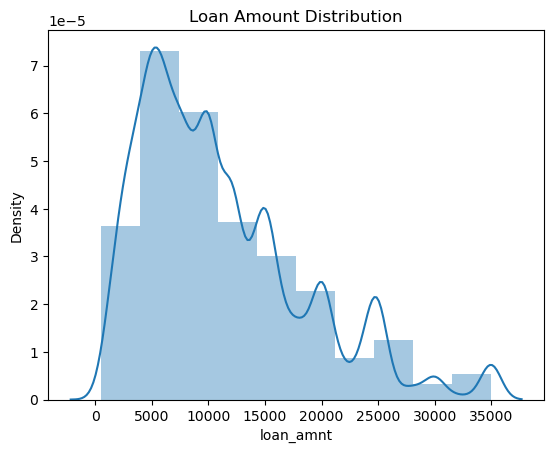

In [897]:
sns.distplot(loan_df["loan_amnt"], bins=10)
plt.title("Loan Amount Distribution")
plt.show()

In [898]:
loan_df["loan_amnt"].describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [899]:
# Categories loam for analysis

def categorize_amount(amount):
    if amount < 5000:
        return 'Low'
    elif amount >=5000 and amount < 15000:
        return 'Medium'
    elif amount >= 15000 and amount < 25000:
        return 'High'
    else:
        return 'Very High'
        
loan_df['loan_amnt_catg'] = loan_df['loan_amnt'].apply(lambda x: categorize_amount(x))

Text(0.5, 1.0, 'Loan Amount Vs Status')

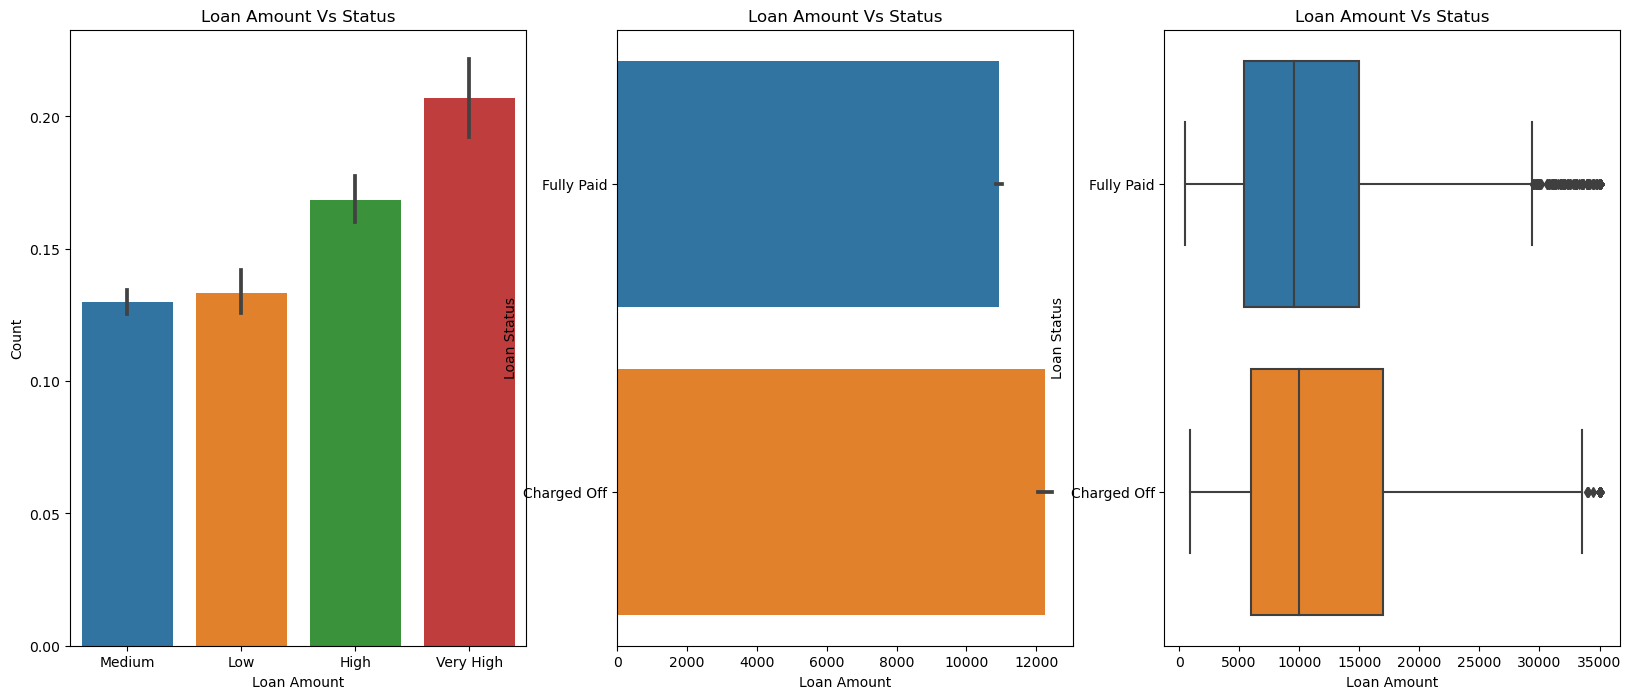

In [900]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
ax = sns.barplot(x='loan_amnt_catg', y='loan_status_catg', data=loan_df)
ax.set(xlabel='Loan Amount', ylabel='Count')
plt.title("Loan Amount Vs Status")

plt.subplot(1, 3, 2)
ax = sns.barplot(data=loan_df, x="loan_amnt", y = "loan_status")
ax.set(xlabel='Loan Amount', ylabel='Loan Status')
plt.title("Loan Amount Vs Status")

plt.subplot(1, 3, 3)
ax = sns.boxplot(x="loan_amnt", y='loan_status', data=loan_df)
ax.set(xlabel='Loan Amount', ylabel='Loan Status')
plt.title("Loan Amount Vs Status")




**Funded Amount by Investor**

In [901]:
loan_df['funded_amnt_inv_catg'] = loan_df['funded_amnt_inv'].apply(lambda x: categorize_amount(x))

In [902]:
loan_df['funded_amnt_inv_catg'].value_counts()

funded_amnt_inv_catg
Medium       20510
Low           9040
High          6658
Very High     1336
Name: count, dtype: int64

Text(0.5, 1.0, 'Funded Amount by Investor Vs Status')

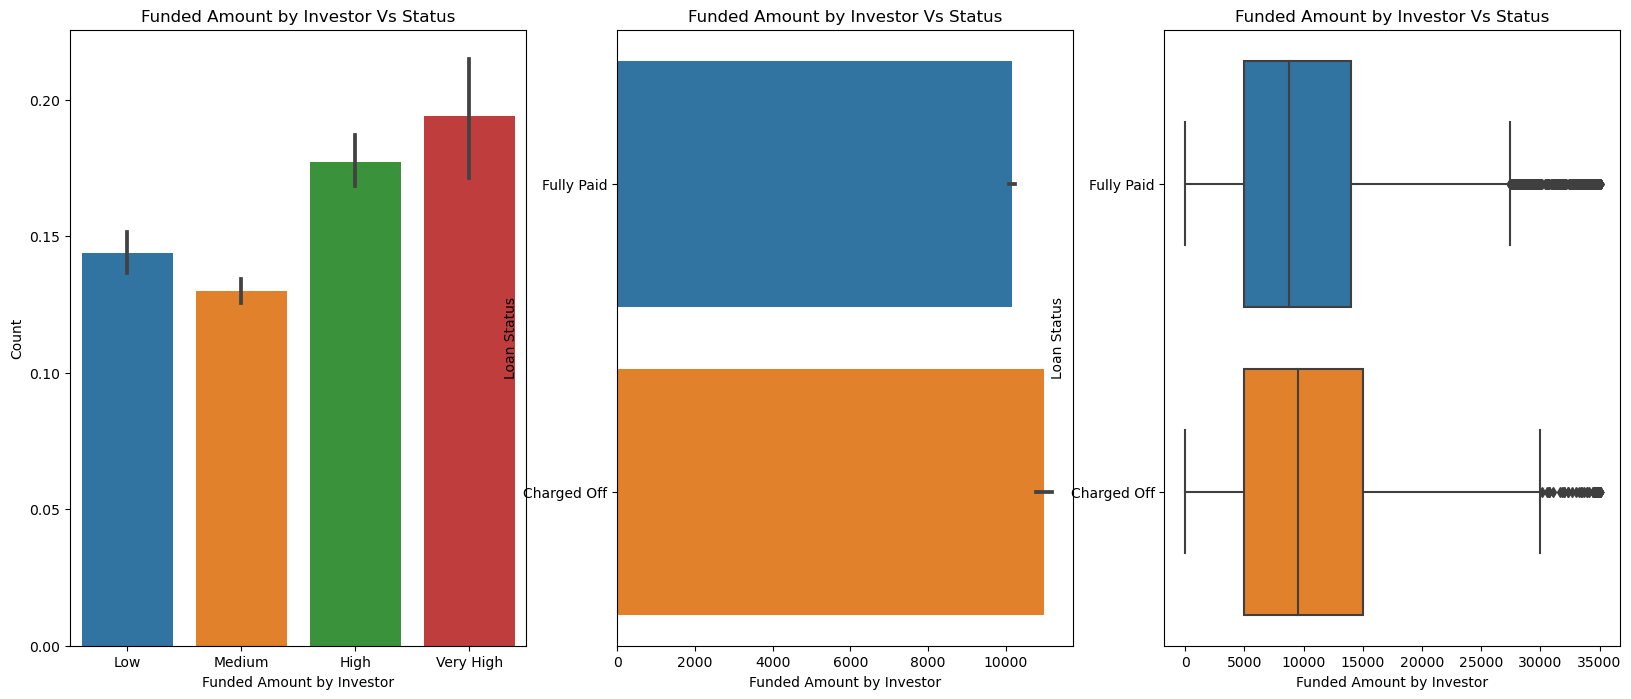

In [903]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
ax = sns.barplot(x='funded_amnt_inv_catg', y='loan_status_catg', data=loan_df)
ax.set(xlabel='Funded Amount by Investor', ylabel='Count')
plt.title("Funded Amount by Investor Vs Status")

plt.subplot(1, 3, 2)
ax = sns.barplot(data=loan_df, x="funded_amnt_inv", y = "loan_status")
ax.set(xlabel='Funded Amount by Investor', ylabel='Loan Status')
plt.title("Funded Amount by Investor Vs Status")

plt.subplot(1, 3, 3)
ax = sns.boxplot(x="funded_amnt_inv", y='loan_status', data=loan_df)
ax.set(xlabel='Funded Amount by Investor', ylabel='Loan Status')
plt.title("Funded Amount by Investor Vs Status")

**Interest Rate**

C:\Users\jeete\AppData\Local\Temp\ipykernel_10344\3536808325.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df["int_rate"], bins=10)


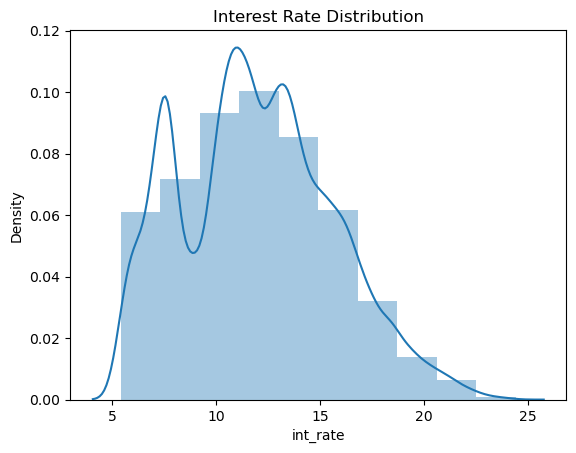

In [904]:
sns.distplot(loan_df["int_rate"], bins=10)
plt.title("Interest Rate Distribution")
plt.show()

In [905]:
loan_df["int_rate"].describe()

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [906]:
# Categories interest rate for analysis

def categorize_rate(rate):
    if rate <= 7:
        return 'Low'
    elif rate > 7 and rate <= 13:
        return 'Medium'
    elif rate > 13 and rate < 18:
        return 'High'
    else:
        return 'Very High'
        
loan_df['int_rate_catg'] = loan_df['int_rate'].apply(lambda x: categorize_rate(x))

Text(0.5, 1.0, 'Interest Rate Vs Ststus')

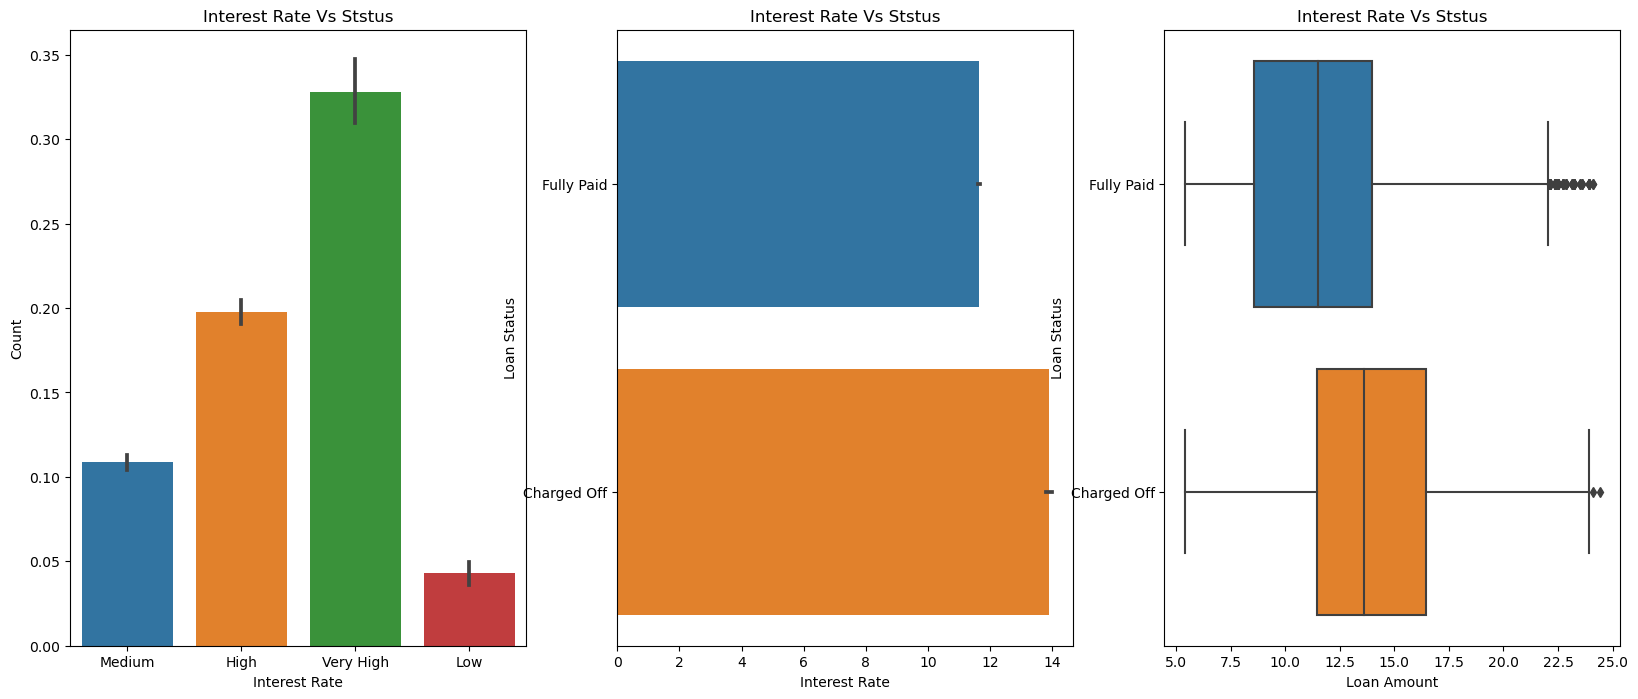

In [907]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
ax = sns.barplot(x='int_rate_catg', y='loan_status_catg', data=loan_df)
ax.set(xlabel='Interest Rate', ylabel='Count')
plt.title("Interest Rate Vs Ststus")

plt.subplot(1, 3, 2)
ax = sns.barplot(data=loan_df, x="int_rate", y = "loan_status")
ax.set(xlabel='Interest Rate', ylabel='Loan Status')
plt.title("Interest Rate Vs Ststus")

plt.subplot(1, 3, 3)
ax = sns.boxplot(x="int_rate", y='loan_status', data=loan_df)
ax.set(xlabel='Loan Amount', ylabel='Loan Status')
plt.title("Interest Rate Vs Ststus")


**Temp - Loan Tenure**

In [908]:
loan_df['term'].value_counts()

term
 36 months    28287
 60 months     9257
Name: count, dtype: int64

Text(0.5, 1.0, 'Term Vs Status')

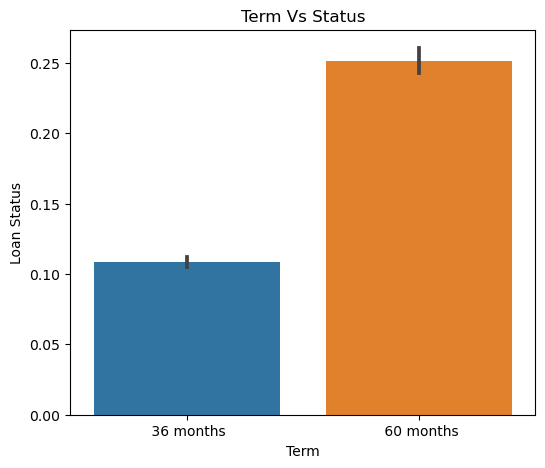

In [909]:
plt.figure(figsize=(6, 5))

ax = sns.barplot(x='term', y='loan_status_catg', data=loan_df)
ax.set(xlabel='Term', ylabel='Loan Status')
plt.title("Term Vs Status")


**Grade**

Text(0.5, 1.0, 'Grade Vs Status')

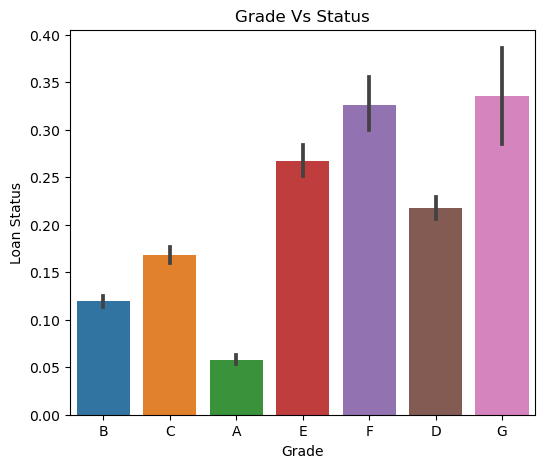

In [910]:
plt.figure(figsize=(6, 5))

ax = sns.barplot(x='grade', y='loan_status_catg', data=loan_df)
ax.set(xlabel='Grade', ylabel='Loan Status')
plt.title("Grade Vs Status")

**Sub Grade**

Text(0.5, 1.0, 'Sub Grade Vs Status')

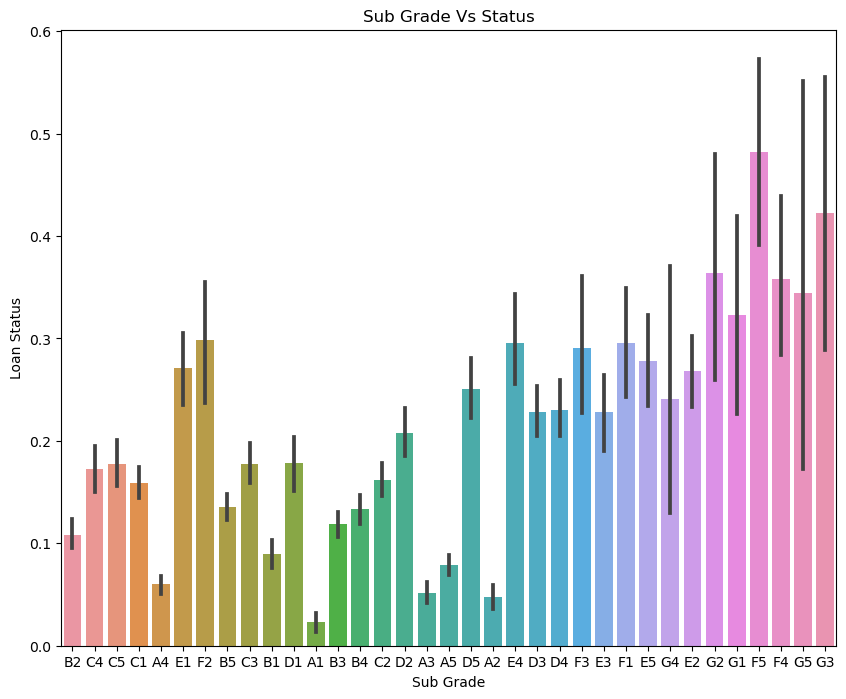

In [911]:
plt.figure(figsize=(10, 8))

ax = sns.barplot(x='sub_grade', y='loan_status_catg', data=loan_df)
ax.set(xlabel='Sub Grade', ylabel='Loan Status')
plt.title("Sub Grade Vs Status")

**Home Ownership**

Text(0.5, 1.0, 'Home Ownership Vs Status')

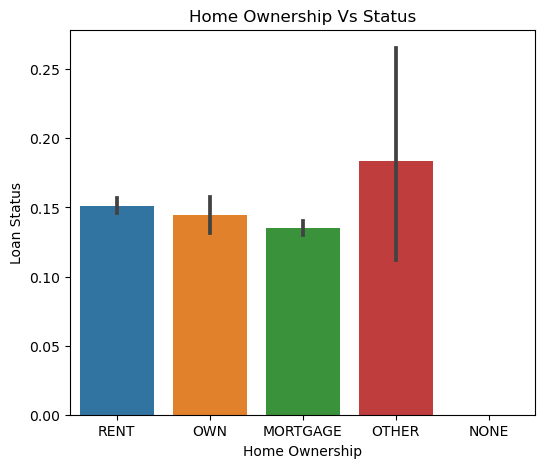

In [912]:
plt.figure(figsize=(6, 5))

ax = sns.barplot(x='home_ownership', y='loan_status_catg', data=loan_df)
ax.set(xlabel='Home Ownership', ylabel='Loan Status')
plt.title("Home Ownership Vs Status")

**Verification Status**

Text(0.5, 1.0, 'Verification Status Vs Status')

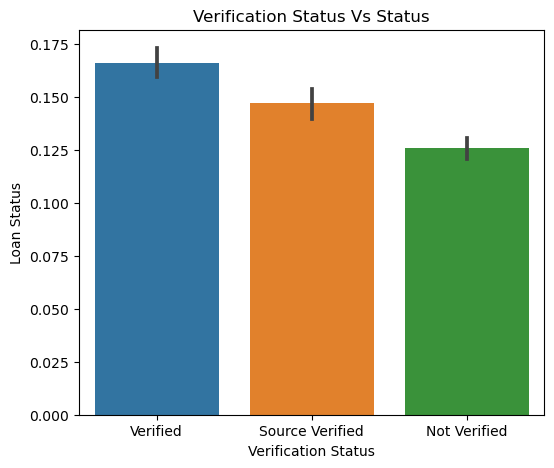

In [913]:
plt.figure(figsize=(6, 5))

ax = sns.barplot(x='verification_status', y='loan_status_catg', data=loan_df)
ax.set(xlabel='Verification Status', ylabel='Loan Status')
plt.title("Verification Status Vs Status")

**Purpose**

Text(0.5, 1.0, 'Purpose Vs Status')

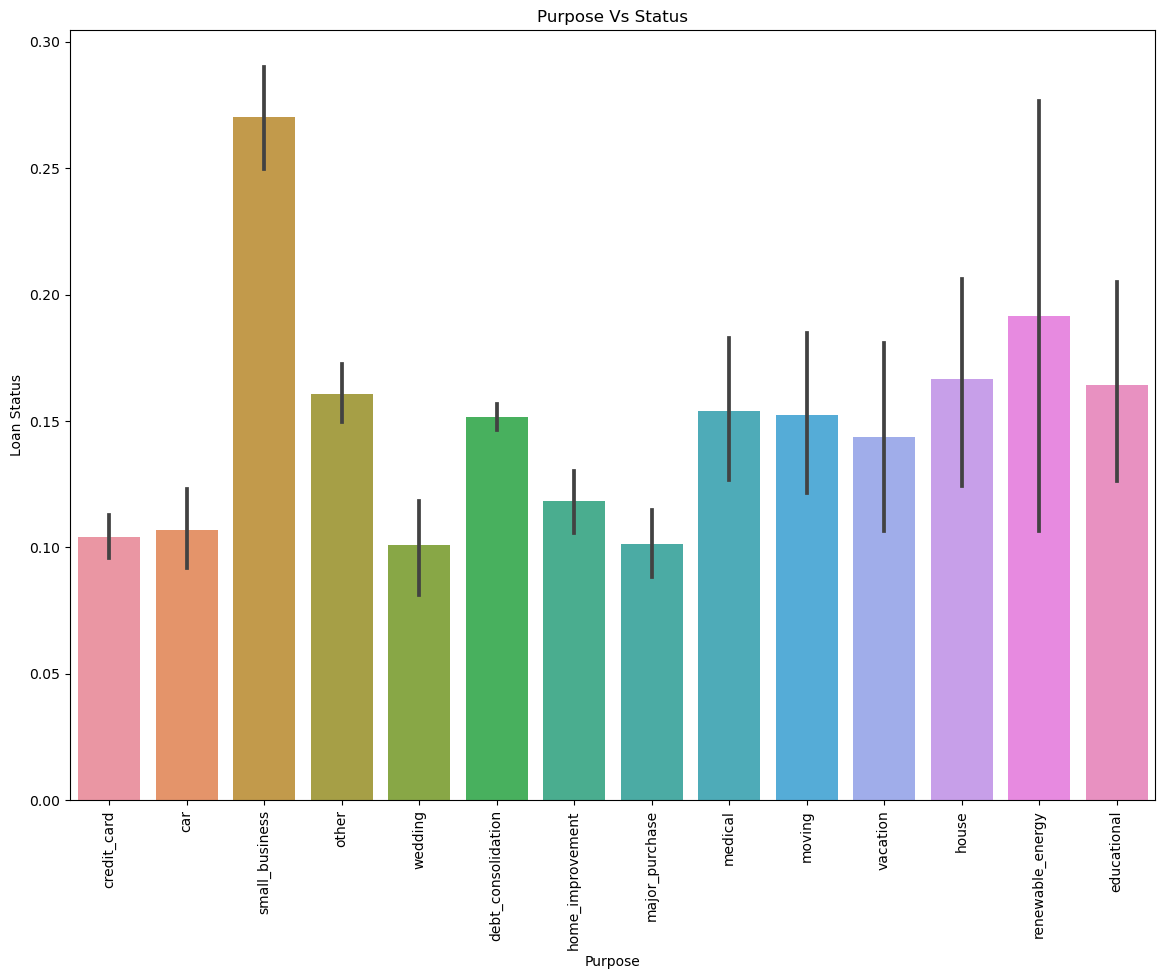

In [914]:
plt.figure(figsize=(14, 10))

ax = sns.barplot(x='purpose', y='loan_status_catg', data=loan_df)
ax.set(xlabel='Purpose', ylabel='Loan Status')
plt.xticks(rotation='vertical')
plt.title("Purpose Vs Status")

**Debt To Income**

In [915]:
loan_df['dti'].describe()

count    37544.000000
mean        13.284186
std          6.660551
min          0.000000
25%          8.160000
50%         13.380000
75%         18.550000
max         29.990000
Name: dti, dtype: float64

In [916]:
def categorize_dti(ratio):
    if ratio <= 10:
        return 'Low'
    elif ratio > 10 and ratio <= 15:
        return 'Medium'
    elif ratio > 15 and ratio <= 20:
        return 'High'
    else:
        return 'Very High'
        
loan_df['dti_catg'] = loan_df['dti'].apply(lambda x: categorize_dti(x))

Text(0.5, 1.0, 'Debt To Income Vs Status')

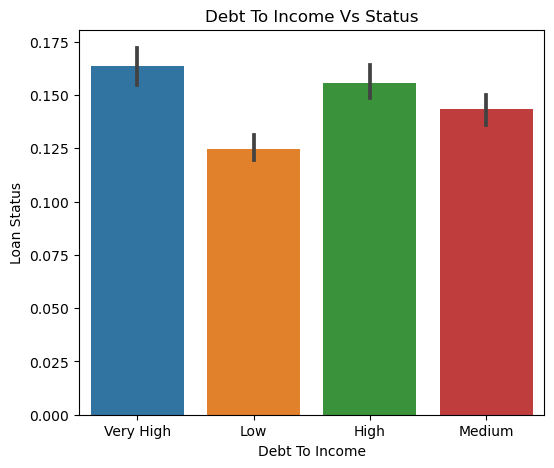

In [917]:
plt.figure(figsize=(6, 5))

ax = sns.barplot(x='dti_catg', y='loan_status_catg', data=loan_df)
ax.set(xlabel='Debt To Income', ylabel='Loan Status')
plt.title("Debt To Income Vs Status")

**Installment Amount**

In [918]:
loan_df['installment'].describe()

count    37544.000000
mean       324.650164
std        208.901055
min         15.690000
25%        167.370000
50%        280.000000
75%        428.942500
max       1305.190000
Name: installment, dtype: float64

In [919]:
def categorize_installment(installment):
    if installment <= 150:
        return 'Low'
    elif installment > 150 and installment <= 300:
        return 'Medium'
    elif installment > 300 and installment <= 500:
        return 'High'
    else:
        return 'Very High'
        
loan_df['installment_catg'] = loan_df['installment'].apply(lambda x: categorize_installment(x))

Text(0.5, 1.0, 'Installment Vs Status')

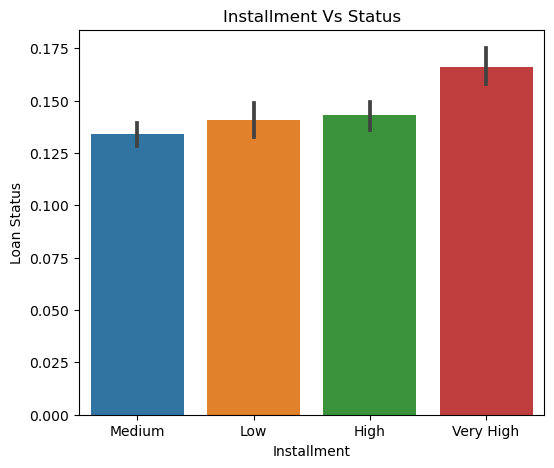

In [920]:
plt.figure(figsize=(6, 5))

ax = sns.barplot(x='installment_catg', y='loan_status_catg', data=loan_df)
ax.set(xlabel='Installment', ylabel='Loan Status')
plt.title("Installment Vs Status")

**Annual Increment**

In [921]:
loan_df['annual_inc'].describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [922]:
def categorize_annual_inc(income):
    if income <= 50000:
        return 'Low'
    elif income > 50000 and income <= 100000:
        return 'Medium'
    elif income > 100000 and income <= 150000:
        return 'High'
    else:
        return 'Very High'
        
loan_df['annual_inc_catg'] = loan_df['annual_inc'].apply(lambda x: categorize_annual_inc(x))

Text(0.5, 1.0, 'Annual Income Vs Status')

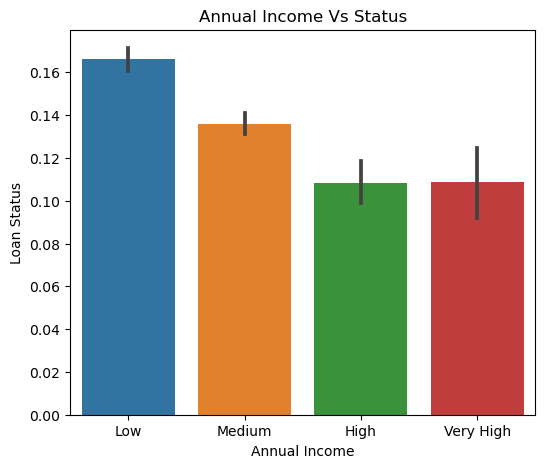

In [923]:
plt.figure(figsize=(6, 5))

ax = sns.barplot(x='annual_inc_catg', y='loan_status_catg', data=loan_df)
ax.set(xlabel='Annual Income', ylabel='Loan Status')
plt.title("Annual Income Vs Status")

**Employee Tenure**

In [924]:
loan_df['emp_length'].describe()

count     37544
unique       10
top          10
freq       8488
Name: emp_length, dtype: object

In [925]:
loan_df['emp_length'].value_counts()

emp_length
10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

Text(0.5, 1.0, 'Employee Length Vs Status')

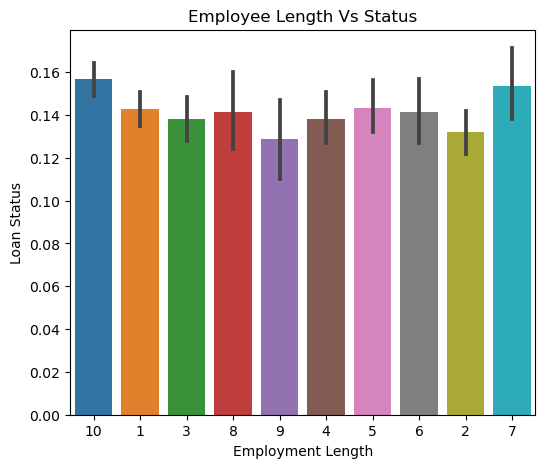

In [926]:
plt.figure(figsize=(6, 5))

ax = sns.barplot(x='emp_length', y='loan_status_catg', data=loan_df)
ax.set(xlabel='Employment Length', ylabel='Loan Status')
plt.title("Employee Length Vs Status")

**Issue Date**

In [927]:
import datetime
loan_df.loc[:,"issue_year"] = loan_df.loc[:,"issue_d"].apply(lambda x : datetime.datetime.strptime(x,"%b-%y").year )
loan_df.loc[:,"issue_month"] = loan_df.loc[:,"issue_d"].apply(lambda x : datetime.datetime.strptime(x,"%b-%y").strftime("%b") )

In [928]:
loan_df["issue_year"].value_counts()

issue_year
2011    19801
2010    11214
2009     4716
2008     1562
2007      251
Name: count, dtype: int64

In [929]:
loan_df["issue_month"].value_counts()

issue_month
Dec    4120
Nov    3890
Oct    3637
Sep    3394
Aug    3321
Jul    3253
Jun    3094
May    2838
Apr    2756
Mar    2632
Jan    2331
Feb    2278
Name: count, dtype: int64

Text(0.5, 1.0, 'Issue Month Vs Status')

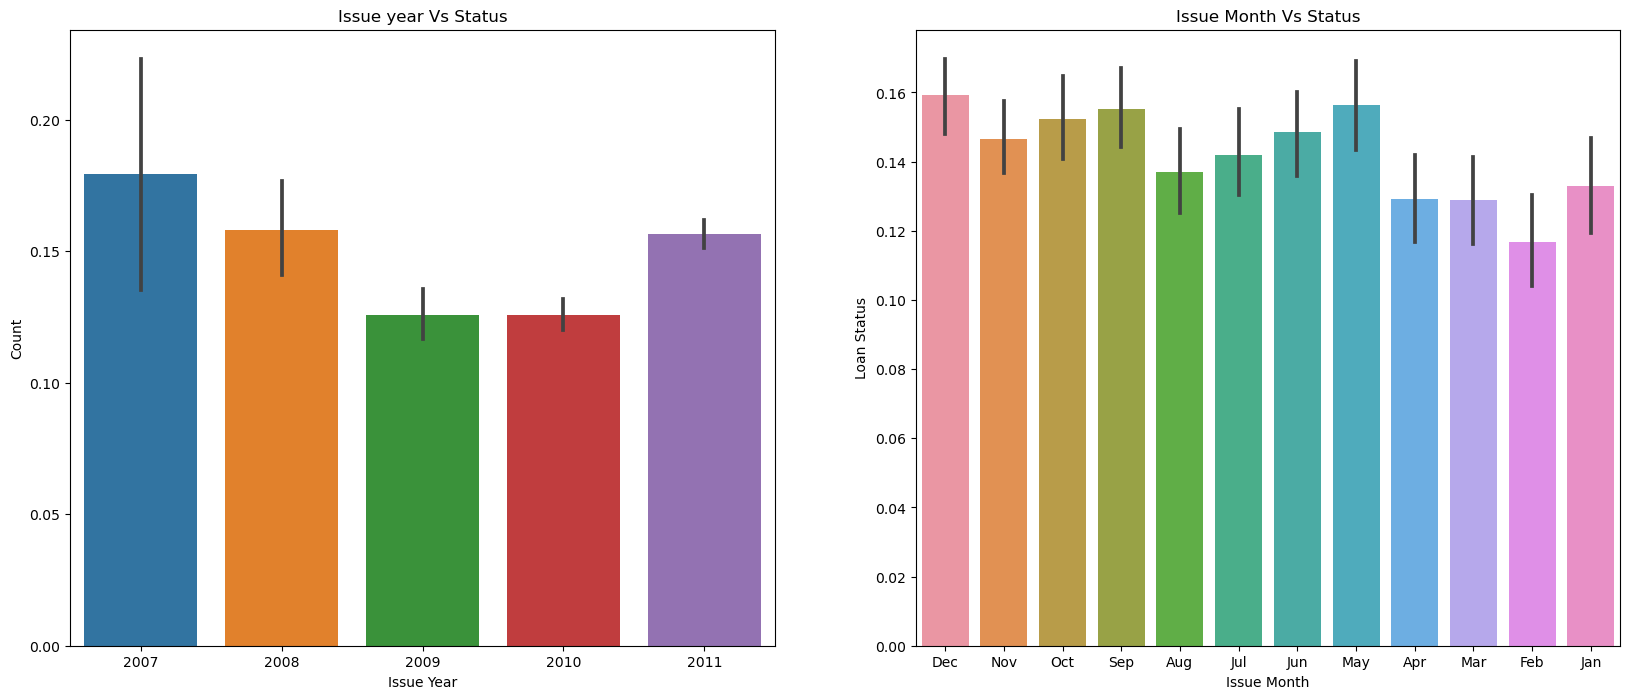

In [930]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
ax = sns.barplot(x='issue_year', y='loan_status_catg', data=loan_df)
ax.set(xlabel='Issue Year', ylabel='Count')
plt.title("Issue year Vs Status")

plt.subplot(1, 2, 2)
ax = sns.barplot(data=loan_df, x="issue_month", y = "loan_status_catg")
ax.set(xlabel='Issue Month', ylabel='Loan Status')
plt.title("Issue Month Vs Status")
